In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def csv_to_np(model_path):
    nparray = np.genfromtxt(model_path,delimiter=',')
    nparray = np.delete(nparray,0,axis=0)
    return nparray

In [73]:
def get_confidence_bounds(data):
    average = np.average(data,axis=0)
    std_dev = np.std(data,axis=0)
    
    data_points = data.shape[1]
    standard_errors = [std_dev[n] / np.sqrt(n+1) for n in range(data_points)]
    
    confidence_multiplier = 1.96  # For a 95% confidence interval
    upper_bounds = [x + confidence_multiplier * se for x, se in zip(average, standard_errors)]
    lower_bounds = [x - confidence_multiplier * se for x, se in zip(average, standard_errors)]
    
    return lower_bounds,upper_bounds

## ON-Policies Data Analysis 

In [3]:
L_PPO = []
for run in range(6):
    data = csv_to_np(r"PPO\PPO_%s.csv"%run)
    L_PPO.append(data)
    PPO_data = np.array(L_PPO)
    
PPO_rewards = PPO_data[:,:,2]
PPO_lengths = PPO_data[:,:,3]


In [4]:
L_A2C = []
for run in range(6):
    data = csv_to_np(r"A2C\A2C_%s.csv"%run)
    L_A2C.append(data)
    A2C_data = np.array(L_A2C)
    
A2C_rewards = A2C_data[:,:,2]
A2C_lengths = A2C_data[:,:,3]
    

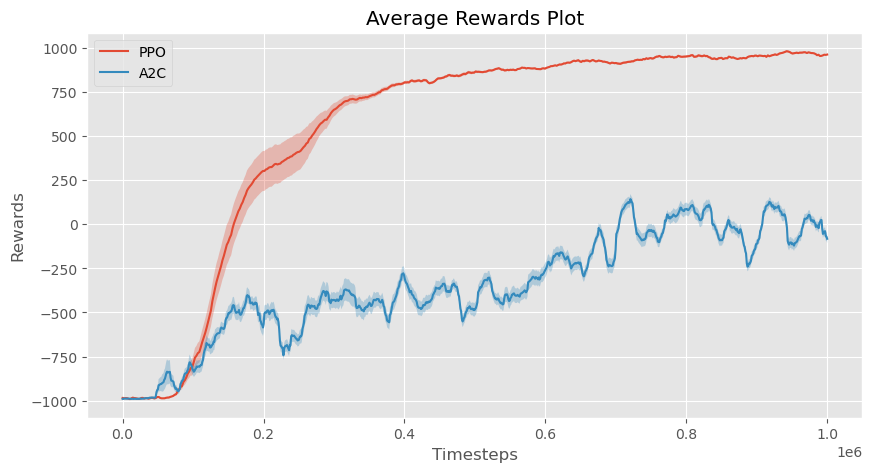

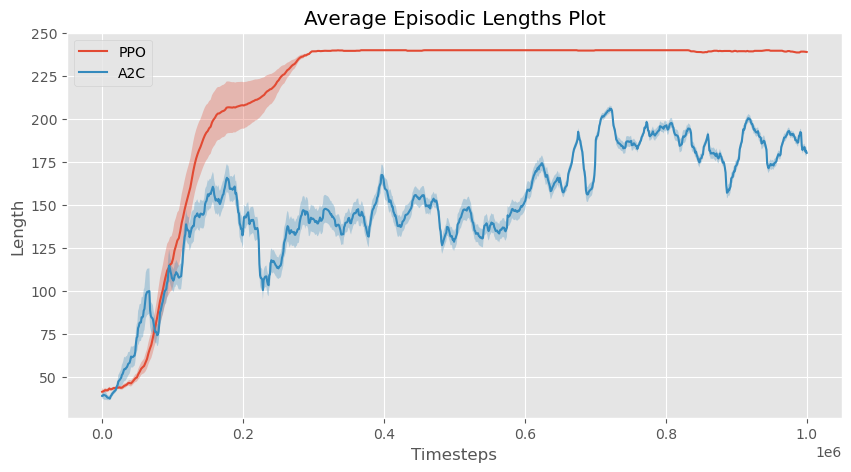

In [92]:
time_steps_PPO = np.linspace(0,1e06,PPO_rewards.shape[1])
time_steps_A2C = np.linspace(0,1e06,A2C_rewards.shape[1])


avg_rewards_PPO = np.average(PPO_rewards,axis=0)
avg_rewards_A2C = np.average(A2C_rewards,axis=0)
avg_lengths_PPO = np.average(PPO_lengths,axis=0)
avg_lengths_A2C = np.average(A2C_lengths,axis=0)


LB_rewards_PPO, UB_rewards_PPO = get_confidence_bounds(PPO_rewards)
LB_rewards_A2C, UB_rewards_A2C = get_confidence_bounds(A2C_rewards)
LB_lengths_PPO, UB_lengths_PPO = get_confidence_bounds(PPO_lengths)
LB_lengths_A2C, UB_lengths_A2C = get_confidence_bounds(A2C_lengths)

plt.figure(figsize=(10,5))
plt.plot(time_steps_PPO,avg_rewards_PPO,label='PPO')
plt.fill_between(time_steps_PPO, LB_rewards_PPO, UB_rewards_PPO, alpha=0.3)
plt.plot(time_steps_A2C,avg_rewards_A2C,label='A2C')
plt.fill_between(time_steps_A2C, LB_rewards_A2C, UB_rewards_A2C, alpha=0.3)
plt.xlabel('Timesteps')
plt.ylabel('Rewards')
plt.title('Average Rewards Plot')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(time_steps_PPO,avg_lengths_PPO,label='PPO')
plt.fill_between(time_steps_PPO, LB_lengths_PPO, UB_lengths_PPO, alpha=0.3)
plt.plot(time_steps_A2C,avg_lengths_A2C,label='A2C')
plt.fill_between(time_steps_A2C, LB_lengths_A2C, UB_lengths_A2C, alpha=0.3)
plt.xlabel('Timesteps')
plt.ylabel('Length')
plt.title('Average Episodic Lengths Plot')
plt.legend()
plt.show()

## OFF-Policies Data Analysis

In [78]:
L_SAC = []
for run in range(5):
    data = csv_to_np(r"SAC\SAC_%s.csv"%run)
    L_SAC.append(data)
    SAC_data = np.array(L_SAC)
    
SAC_rewards = SAC_data[:,:,2]
SAC_lengths = SAC_data[:,:,3]


In [83]:
L_TD3 = []
for run in range(5):
    data = csv_to_np(r"TD3\TD3_%s.csv"%run)
    L_TD3.append(data)
    TD3_data = np.array(L_TD3)
    
TD3_rewards = TD3_data[:,:,2]
TD3_lengths = TD3_data[:,:,3]

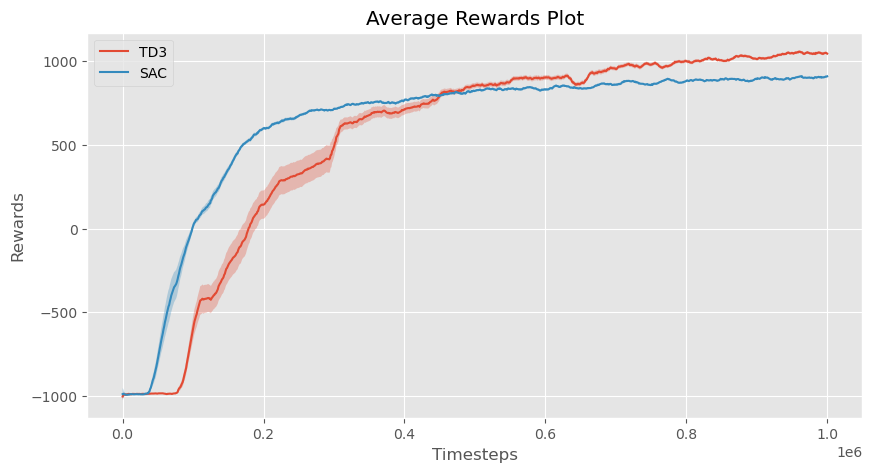

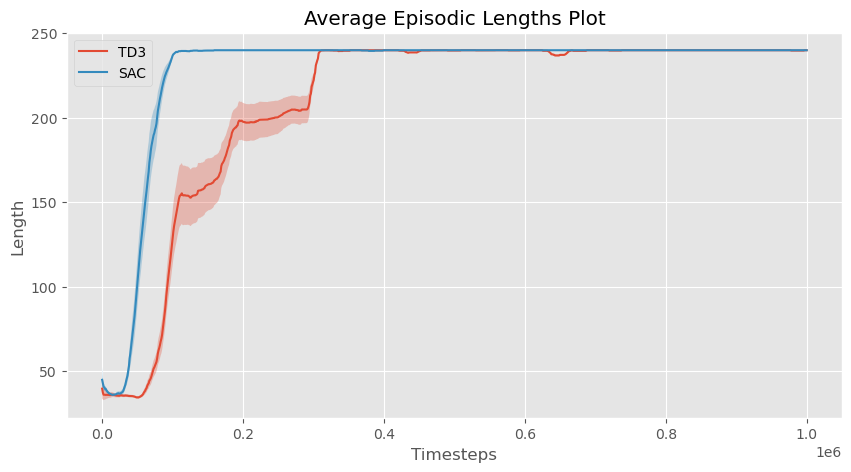

In [91]:
time_steps_TD3 = np.linspace(0,1e06,TD3_rewards.shape[1])
time_steps_SAC = np.linspace(0,1e06,SAC_rewards.shape[1])


avg_rewards_TD3 = np.average(TD3_rewards,axis=0)
avg_rewards_SAC = np.average(SAC_rewards,axis=0)
avg_lengths_TD3 = np.average(TD3_lengths,axis=0)
avg_lengths_SAC = np.average(SAC_lengths,axis=0)


LB_rewards_TD3, UB_rewards_TD3 = get_confidence_bounds(TD3_rewards)
LB_rewards_SAC, UB_rewards_SAC = get_confidence_bounds(SAC_rewards)
LB_lengths_TD3, UB_lengths_TD3 = get_confidence_bounds(TD3_lengths)
LB_lengths_SAC, UB_lengths_SAC = get_confidence_bounds(SAC_lengths)

plt.figure(figsize=(10,5))
plt.plot(time_steps_TD3,avg_rewards_TD3,label='TD3')
plt.fill_between(time_steps_TD3, LB_rewards_TD3, UB_rewards_TD3, alpha=0.3)
plt.plot(time_steps_SAC,avg_rewards_SAC,label='SAC')
plt.fill_between(time_steps_SAC, LB_rewards_SAC, UB_rewards_SAC, alpha=0.3)
plt.xlabel('Timesteps')
plt.ylabel('Rewards')
plt.title('Average Rewards Plot')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(time_steps_TD3,avg_lengths_TD3,label='TD3')
plt.fill_between(time_steps_TD3, LB_lengths_TD3, UB_lengths_TD3, alpha=0.3)
plt.plot(time_steps_SAC,avg_lengths_SAC,label='SAC')
plt.fill_between(time_steps_SAC, LB_lengths_SAC, UB_lengths_SAC, alpha=0.3)
plt.xlabel('Timesteps')
plt.ylabel('Length')
plt.title('Average Episodic Lengths Plot')
plt.legend()
plt.show()
